# Get bounding boxes for blocks and lines of text on each page.

### References:

- <a href="https://numpy.org/">NumPy</a>

- <a href="https://tesseract-ocr.github.io/tessdoc/Home.html">Tesseract User Manual</a>

- [pytesseract PyPI](https://pypi.org/project/pytesseract/)

In [5]:
import threading
import img2text as i2t
from screen2Text import screen2text as s2t
from tqdm import tqdm

import matplotlib.pyplot as plt

In [6]:
i2t.pytesseract.pytesseract.tesseract_cmd

'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [7]:
s2t.ClipImg2Text.config_dict

{0: 'Orientation and script detection (OSD) only.',
 1: 'Automatic page segmentation with OSD.',
 2: 'Automatic page segmentation, but no OSD, or OCR.',
 3: 'Fully automatic page segmentation, but no OSD. (Default)',
 4: 'Assume a single column of text of variable sizes.',
 5: 'Assume a single uniform block of vertically aligned text.',
 6: 'Assume a single uniform block of text.',
 7: 'Treat the image as a single text line.',
 8: 'Treat the image as a single word.',
 9: 'Treat the image as a single word in a circle.',
 10: 'Treat the image as a single character.',
 11: 'Sparse text. Find as much text as possible in no particular order.',
 12: 'Sparse text with OSD.',
 13: 'Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.'}

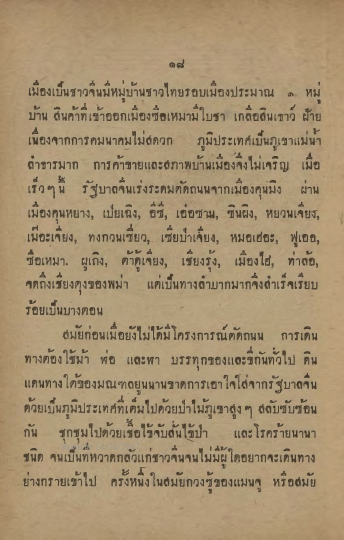

In [8]:
source_dir = 'pages/clipped_RGB/'
im = i2t.Image.open(source_dir + 'page_043.png')

im.reduce(2)

In [9]:
_ = i2t.tesseract_osd(im)

Tesseract: ['Page number: 0', 'Orientation in degrees: 0', 'Rotate: 0', 'Orientation confidence: 11.15', 'Script: Thai', 'Script confidence: 19.00', '']


In [10]:
_ = i2t.tesseract_osd(im.convert('L'))

Tesseract: ['Page number: 0', 'Orientation in degrees: 0', 'Rotate: 0', 'Orientation confidence: 13.20', 'Script: Thai', 'Script confidence: 15.28', '']


In [11]:
_ = i2t.tesseract_osd(i2t.binarize_as_array(im.convert('L'), 'otsu'))

 - thresholding method: otsu, threshold set to 117
Tesseract: ['Page number: 0', 'Orientation in degrees: 0', 'Rotate: 0', 'Orientation confidence: 13.20', 'Script: Thai', 'Script confidence: 15.28', '']


 - thresholding method: otsu, threshold set to 118
 - reduced to (551, 864)
 - no adjustment needed


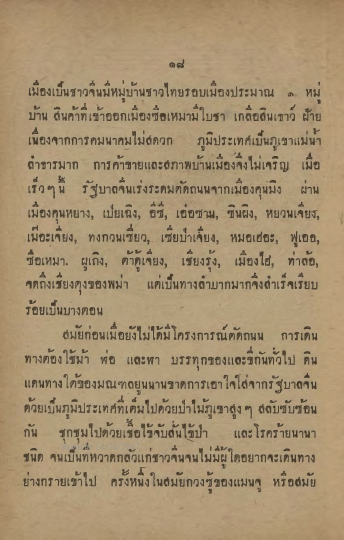

In [12]:
i2t.deskew(im, True).reduce(2)

### Getting image segmengtation data from tesseract as a pandas dataframe

In [21]:
data = i2t.pd.DataFrame(i2t.pytesseract.image_to_data(im, lang='tha', config='--psm 3', output_type='data.frame'))
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,688,1080,-1.000000,NaN
1,2,1,1,0,0,0,338,118,31,19,-1.000000,NaN
2,3,1,1,1,0,0,338,118,31,19,-1.000000,NaN
3,4,1,1,1,1,0,338,118,31,19,-1.000000,NaN
4,5,1,1,1,1,1,338,124,13,12,96.888199,๑
...,...,...,...,...,...,...,...,...,...,...,...,...
661,5,1,2,1,25,39,577,957,10,16,97.020996,อ
662,5,1,2,1,25,40,590,954,8,19,93.263603,ส
663,5,1,2,1,25,41,597,937,13,47,92.912819,ม
664,5,1,2,1,25,42,609,957,8,17,93.306000,ั


In [36]:
na = data[data.text.isna()]
na

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,688,1080,-1.0,NaN
1,2,1,1,0,0,0,338,118,31,19,-1.0,NaN
2,3,1,1,1,0,0,338,118,31,19,-1.0,NaN
3,4,1,1,1,1,0,338,118,31,19,-1.0,NaN
6,2,1,2,0,0,0,47,159,595,832,-1.0,NaN
7,3,1,2,1,0,0,47,160,595,814,-1.0,NaN
8,4,1,2,1,1,0,66,160,367,16,-1.0,NaN
16,4,1,2,1,2,0,57,159,584,53,-1.0,NaN
59,4,1,2,1,3,0,57,192,585,81,-1.0,NaN
91,4,1,2,1,4,0,57,250,585,56,-1.0,NaN


In [10]:
data.dropna(inplace=True)  # This is not right
data.sort_values(by=['block_num', 'line_num'], inplace=True)
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,338,124,13,12,96.888199,๑
5,5,1,1,1,1,2,353,118,16,19,81.718460,๕
9,5,1,2,1,1,1,115,162,12,14,29.449409,"ด,"
10,5,1,2,1,1,2,179,161,11,11,40.652428,๕
11,5,1,2,1,1,3,189,149,10,32,62.502052,ณ
...,...,...,...,...,...,...,...,...,...,...,...,...
661,5,1,2,1,25,39,577,957,10,16,97.020996,อ
662,5,1,2,1,25,40,590,954,8,19,93.263603,ส
663,5,1,2,1,25,41,597,937,13,47,92.912819,ม
664,5,1,2,1,25,42,609,957,8,17,93.306000,ั


In [11]:
data.groupby(['block_num', 'line_num']).height.max()

block_num  line_num
1          1           19
2          1           32
           2           53
           3           63
           4           54
           5           15
           6           42
           7           27
           8           62
           9           67
           10          68
           11          21
           12          65
           13          55
           14          46
           15          15
           16          44
           17          42
           18          50
           19          20
           20          60
           21          72
           22          60
           23          24
           24          82
           25          68
Name: height, dtype: int64

### Finding text block boundaries

In [12]:
block_1 = i2t.pd.DataFrame(data[data.block_num == 1])
block_1

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,338,124,13,12,96.888199,๑
5,5,1,1,1,1,2,353,118,16,19,81.718460,๕


In [13]:
block_1['right'] = block_1.left + block_1.width
block_1

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,right
4,5,1,1,1,1,1,338,124,13,12,96.888199,๑,351
5,5,1,1,1,1,2,353,118,16,19,81.718460,๕,369


In [14]:
(block_1.left + block_1.width).max()

369

In [15]:
last_line = block_1[block_1.line_num == block_1.line_num.max()]
last_line

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,right
4,5,1,1,1,1,1,338,124,13,12,96.888199,๑,351
5,5,1,1,1,1,2,353,118,16,19,81.718460,๕,369


In [16]:
left = block_1.left.min()
top = block_1.top.min()
right = block_1.right.max()
bottom = last_line.top.min() + last_line.height.max()

left, top, right, bottom

(338, 118, 369, 137)

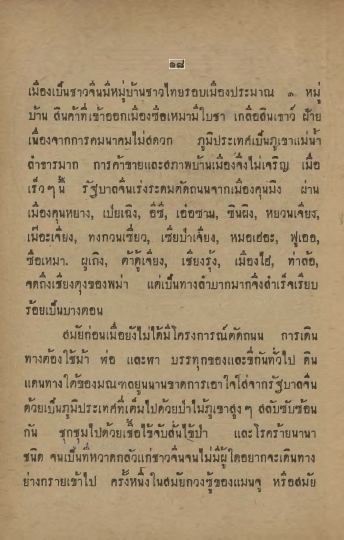

In [17]:
boxed_im = im.copy()
draw = i2t.ImageDraw.Draw(boxed_im)
box = (left, top, right, bottom)
draw.rectangle(box, width=1)
display(boxed_im.reduce(2))

In [18]:
block_2 = i2t.pd.DataFrame(data[data.block_num == 2])
block_2['right'] = block_2.left + block_2.width
block_2

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,right
9,5,1,2,1,1,1,115,162,12,14,29.449409,"ด,",127
10,5,1,2,1,1,2,179,161,11,11,40.652428,๕,190
11,5,1,2,1,1,3,189,149,10,32,62.502052,ณ,199
12,5,1,2,1,1,4,215,161,6,11,50.002960,2,221
13,5,1,2,1,1,5,245,161,3,7,81.582466,!,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,5,1,2,1,25,39,577,957,10,16,97.020996,อ,587
662,5,1,2,1,25,40,590,954,8,19,93.263603,ส,598
663,5,1,2,1,25,41,597,937,13,47,92.912819,ม,610
664,5,1,2,1,25,42,609,957,8,17,93.306000,ั,617


In [19]:
(block_2.left + block_2.width).max()

642

In [20]:
block_2.left + block_2.width

9      127
10     190
11     199
12     221
13     248
      ... 
661    587
662    598
663    610
664    617
665    631
Length: 633, dtype: int64

In [21]:
last_line = block_2[block_2.line_num == block_2.line_num.max()]
last_line

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,right
623,5,1,2,1,25,1,47,957,8,16,93.150497,ย,55
624,5,1,2,1,25,2,55,943,11,29,92.407860,่,66
625,5,1,2,1,25,3,65,938,9,45,93.306221,า,74
626,5,1,2,1,25,4,73,957,6,16,97.020409,ง,79
627,5,1,2,1,25,5,85,957,8,16,97.008743,ก,93
628,5,1,2,1,25,6,96,956,10,17,93.303650,ร,106
629,5,1,2,1,25,7,110,958,9,14,93.224838,า,119
630,5,1,2,1,25,8,120,956,11,17,96.994507,ย,131
631,5,1,2,1,25,9,135,956,13,17,60.981518,เข,148
632,5,1,2,1,25,10,147,938,17,45,43.886318,ช่า,164


In [22]:
left = block_2.left.min()
top = block_2.top.min()
right = block_2.right.max()
bottom = last_line.top.min() + last_line.height.max()

left, top, right, bottom


(47, 149, 642, 991)

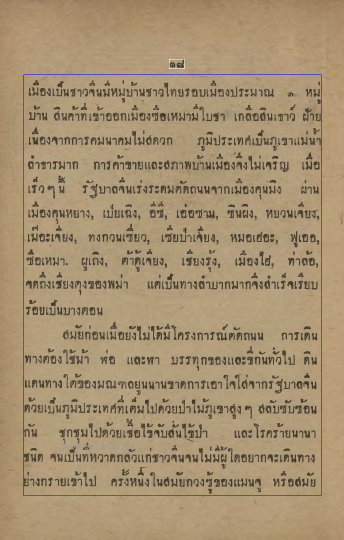

In [23]:
draw = i2t.ImageDraw.Draw(boxed_im)
box = (left, top, right, bottom)
draw.rectangle(box, width=1, outline='blue')
display(boxed_im.reduce(2))

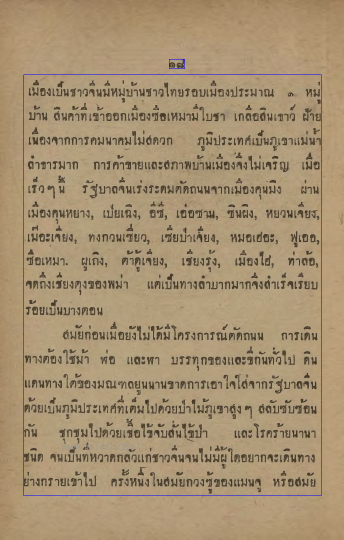

In [19]:
pp = i2t.Preprocessor(im)
pp.find_all_blocks(psm=3)

pp.blocks
display(pp.draw_blocks().reduce(2))

In [20]:
pp.data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,338,124,13,12,96.888199,๑
5,5,1,1,1,1,2,353,118,16,19,81.718460,๕
9,5,1,2,1,1,1,115,162,12,14,29.449409,"ด,"
10,5,1,2,1,1,2,179,161,11,11,40.652428,๕
11,5,1,2,1,1,3,189,149,10,32,62.502052,ณ
...,...,...,...,...,...,...,...,...,...,...,...,...
661,5,1,2,1,25,39,577,957,10,16,97.020996,อ
662,5,1,2,1,25,40,590,954,8,19,93.263603,ส
663,5,1,2,1,25,41,597,937,13,47,92.912819,ม
664,5,1,2,1,25,42,609,957,8,17,93.306000,ั


{1: (338, 118, 369, 137), 2: (47, 149, 642, 991)}


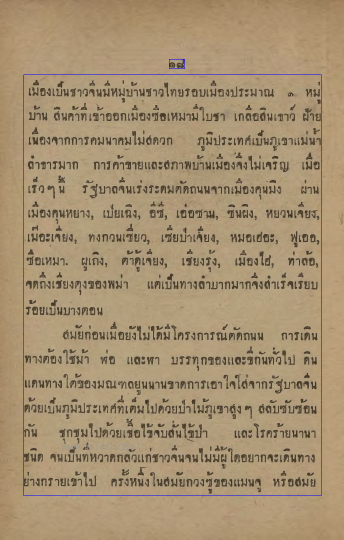

In [17]:
pp.find_all_blocks(psm=1)
print(pp.blocks)
display(pp.draw_blocks().reduce(2))

In [18]:
pp.data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,338,124,13,12,96.888199,๑
5,5,1,1,1,1,2,353,118,16,19,81.718460,๕
9,5,1,2,1,1,1,115,162,12,14,29.449409,"ด,"
10,5,1,2,1,1,2,179,161,11,11,40.652428,๕
11,5,1,2,1,1,3,189,149,10,32,62.502052,ณ
...,...,...,...,...,...,...,...,...,...,...,...,...
661,5,1,2,1,25,39,577,957,10,16,97.020996,อ
662,5,1,2,1,25,40,590,954,8,19,93.263603,ส
663,5,1,2,1,25,41,597,937,13,47,92.912819,ม
664,5,1,2,1,25,42,609,957,8,17,93.306000,ั


{1: (47, 118, 685, 991)}


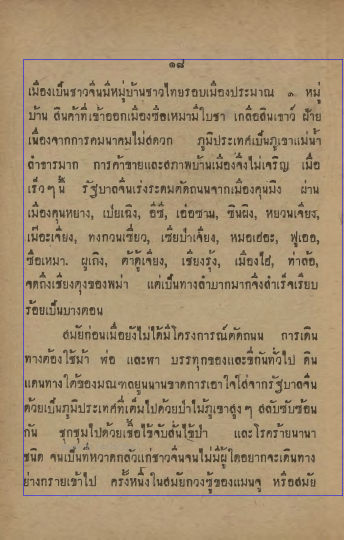

In [27]:
pp = i2t.Preprocessor(im)
pp.find_all_blocks(psm=6)
print(pp.blocks)
display(pp.draw_blocks().reduce(2))

In [31]:
for entry in tqdm(list(i2t.os.scandir(source_dir))):
    name = entry.name
    if name.endswith('.png'):
        pp = i2t.Preprocessor(i2t.Image.open(entry.path))
        pp.find_all_blocks(psm=3)
        # print(f'{name}: ', pp.blocks)
        out_im = pp.draw_blocks()
        out_im.save(source_dir + 'blocks_rgb/' + name.replace('.', '_blocks.'))

100%|██████████| 656/656 [12:32<00:00,  1.15s/it]


In [28]:
def batch_find_blocks(scandir_entries, dst_dir):
    for entry in scandir_entries:
        name = entry.name
        if name.endswith('.png'):
            pp = i2t.Preprocessor(i2t.Image.open(entry.path))
            pp.find_all_blocks(psm=3)
            # print(f'{name}: ', pp.blocks)
            out_im = pp.draw_blocks()
            out_im.save(dst_dir + name.replace('.', '_blocks.'))

In [33]:
dst_dir = source_dir + 'blocks_rgb/'
entries = [entry for entry in list(i2t.os.scandir(source_dir)) if entry.name.endswith('.png')]
if len(entries) > 12:
    f_array = i2t.np.array(entries)
    print(f_array.size)
    chunks = i2t.np.array_split(f_array, 6)
    for chunk in chunks:
        print(chunk[0], '...', chunk[-1])
    threads = [threading.Thread(target=batch_find_blocks, args=(chunk, dst_dir), name=f'{chunk[0].name}...{chunk[-1].name}') for chunk in chunks]
    start = s2t.dt.now()
    print(f'Starting: {start}')
    for thread in threads:
        thread.start()
    for thread in threads:
        thread.join()
        print(thread)
    print(f'Done in {s2t.dt.now() - start}')


654
<DirEntry 'page_001.png'> ... <DirEntry 'page_109.png'>
<DirEntry 'page_110.png'> ... <DirEntry 'page_218.png'>
<DirEntry 'page_219.png'> ... <DirEntry 'page_327.png'>
<DirEntry 'page_328.png'> ... <DirEntry 'page_436.png'>
<DirEntry 'page_437.png'> ... <DirEntry 'page_545.png'>
<DirEntry 'page_546.png'> ... <DirEntry 'page_654.png'>
Starting: 2024-05-05 19:13:10.935921
<Thread(page_001.png...page_109.png, stopped 15912)>
<Thread(page_110.png...page_218.png, stopped 18284)>
<Thread(page_219.png...page_327.png, stopped 18328)>
<Thread(page_328.png...page_436.png, stopped 20352)>
<Thread(page_437.png...page_545.png, stopped 19152)>
<Thread(page_546.png...page_654.png, stopped 16556)>
Done in 0:02:27.965999
